In [40]:
%matplotlib inline
import torch
from fastai.basics import *
import fastai


In [5]:
n = 100

In [37]:
x = torch.ones(n,2)
# print(x)

x[:,0].uniform_(-1.,1)
# output first 20 rows
x[:10]


tensor([[-0.6707,  1.0000],
        [-0.7426,  1.0000],
        [ 0.2797,  1.0000],
        [-0.5518,  1.0000],
        [ 0.2569,  1.0000],
        [ 0.4778,  1.0000],
        [-0.9173,  1.0000],
        [-0.7297,  1.0000],
        [ 0.4027,  1.0000],
        [ 0.6922,  1.0000]])

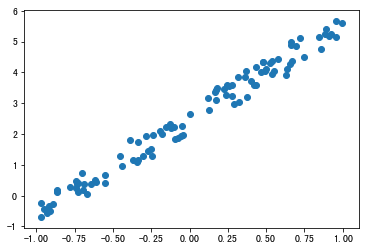

In [46]:
a = torch.tensor([3.0,2])
y = x @ a + torch.rand(n)
# y = 3.0 * x + 2 * 1 + rand()[-1,1]
plt.scatter(x[:,0] , y);

$$ Loss =  \sum_{i = 1}^{i = n}\cfrac{(\hat{y} - y)^2}{n} $$


In [56]:
#  learn params a [3, 2+rand[-1,1]]
def mse(y_hat , y):
    return ((y_hat - y) ** 2).mean()
    

tensor([-1.,  1.]) torch.FloatTensor


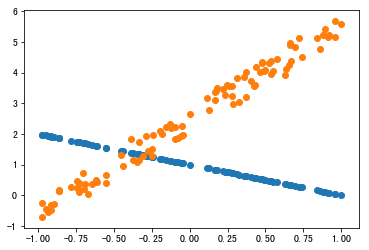

In [90]:
# init weights . e.g (-1,1)
a = torch.tensor([-1.,1.0])
y_hat = x @ a 
print(a, a.type())
# print plot 
plt.scatter(x[:,0],y_hat)
plt.scatter(x[:,0],y)

In [91]:
a = nn.Parameter(a)
lr = 0.01

In [92]:
def update(t):
    y_hat = x @ a
    loss = mse(y, y_hat)
    if t % 100 == 0: 
        print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad) 
        a.grad.zero_()

tensor(0.0711, grad_fn=<MeanBackward1>)
tensor(0.0711, grad_fn=<MeanBackward1>)
tensor(0.0711, grad_fn=<MeanBackward1>)
tensor(0.0711, grad_fn=<MeanBackward1>)
tensor(0.0711, grad_fn=<MeanBackward1>)
tensor(0.0711, grad_fn=<MeanBackward1>)
tensor(0.0711, grad_fn=<MeanBackward1>)
tensor(0.0711, grad_fn=<MeanBackward1>)
tensor(0.0711, grad_fn=<MeanBackward1>)
tensor(0.0711, grad_fn=<MeanBackward1>)


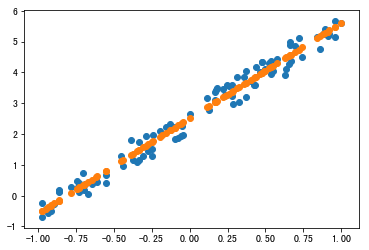

In [94]:
epochs = 1000
for epoch in range(epochs):
    update(epoch)
plt.scatter(x[:,0],y)
y_hat = x @ a
plt.scatter(x[:,0],y_hat)
 

In [21]:
import numpy as np

x = np.random.randn(3,3)
print(x)
x[:2]
# 前两行,第三列
x[:2,2]

[[ 0.53357081  0.82348664  0.2606407 ]
 [ 0.62388285  0.75781679 -1.25702566]
 [-0.8751937   0.58329487 -0.28917876]]


array([ 0.2606407 , -1.25702566])

In [112]:
# y = torch.tensor((1.0,2),requires_grad=True)
x = torch.tensor((1.0,2), requires_grad = True)
y = x + 1
z = y * y * 3 
print(y)
print(z)
z.requires_grad_(True)
print(z.grad)


out = z.mean()
print(out)
out.backward()
print(x.grad)

tensor([2., 3.], grad_fn=<AddBackward0>)
tensor([12., 27.], grad_fn=<MulBackward0>)
None
tensor(19.5000, grad_fn=<MeanBackward1>)
tensor([6., 9.])


In [127]:
x = torch.randn(3 , requires_grad = True)
y = x * 2
print(y)
while y.data.norm() < 1000:
    y = y * 2
print(y)
v = torch.tensor([0.1, 1.0 , 0.0001], dtype = torch.float)
y.backward(v)
x.grad

tensor([-0.6609,  1.6577, -0.3388], grad_fn=<MulBackward0>)
tensor([-676.7324, 1697.5181, -346.9022], grad_fn=<MulBackward0>)


tensor([2.0480e+02, 2.0480e+03, 2.0480e-01])